In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline


In [4]:
data = pd.read_csv('train - train.csv')

In [5]:
data.shape

(2000, 21)

# Data Exploration

In [6]:
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [7]:
data.tail()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0
1999,510,1,2.0,1,5.0,1.0,45.0,0.9,168.0,6.0,...,483.0,754.0,3919.0,19.0,4.0,2,1,1,1,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [12]:
data.nunique().sort_values()


blue                2
touch_screen        2
dual_sim            2
four_g              2
three_g             2
wifi                2
price_range         4
n_cores             8
m_dep              10
sc_h               15
talk_time          19
sc_w               19
fc                 20
pc                 21
clock_speed        26
int_memory         63
mobile_wt         121
battery_power    1094
px_width         1109
px_height        1135
ram              1561
dtype: int64

In [13]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
data.shape

(2000, 21)

In [15]:
display(data.describe())


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [16]:
inf_mask = np.isinf(data)
inf_counts = inf_mask.sum()
print(inf_counts)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [17]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Exploratory Data Analysis (EDA)


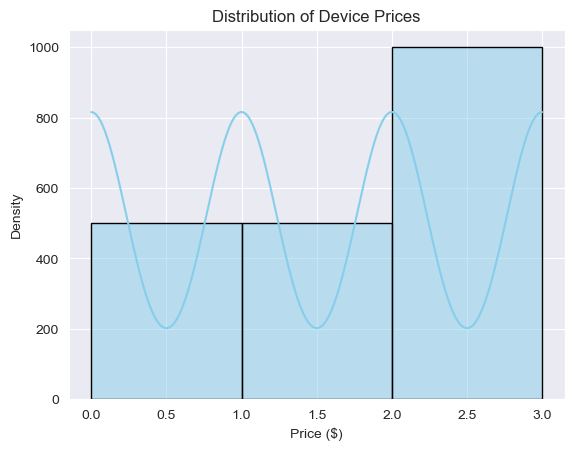

In [18]:
warnings.filterwarnings("ignore", category=FutureWarning)
device_prices = data['price_range'].values
bin_edges = np.arange(min(device_prices), max(device_prices) + 1, 1)  
sns.histplot(data['price_range'], kde=True, bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Distribution of Device Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.show()

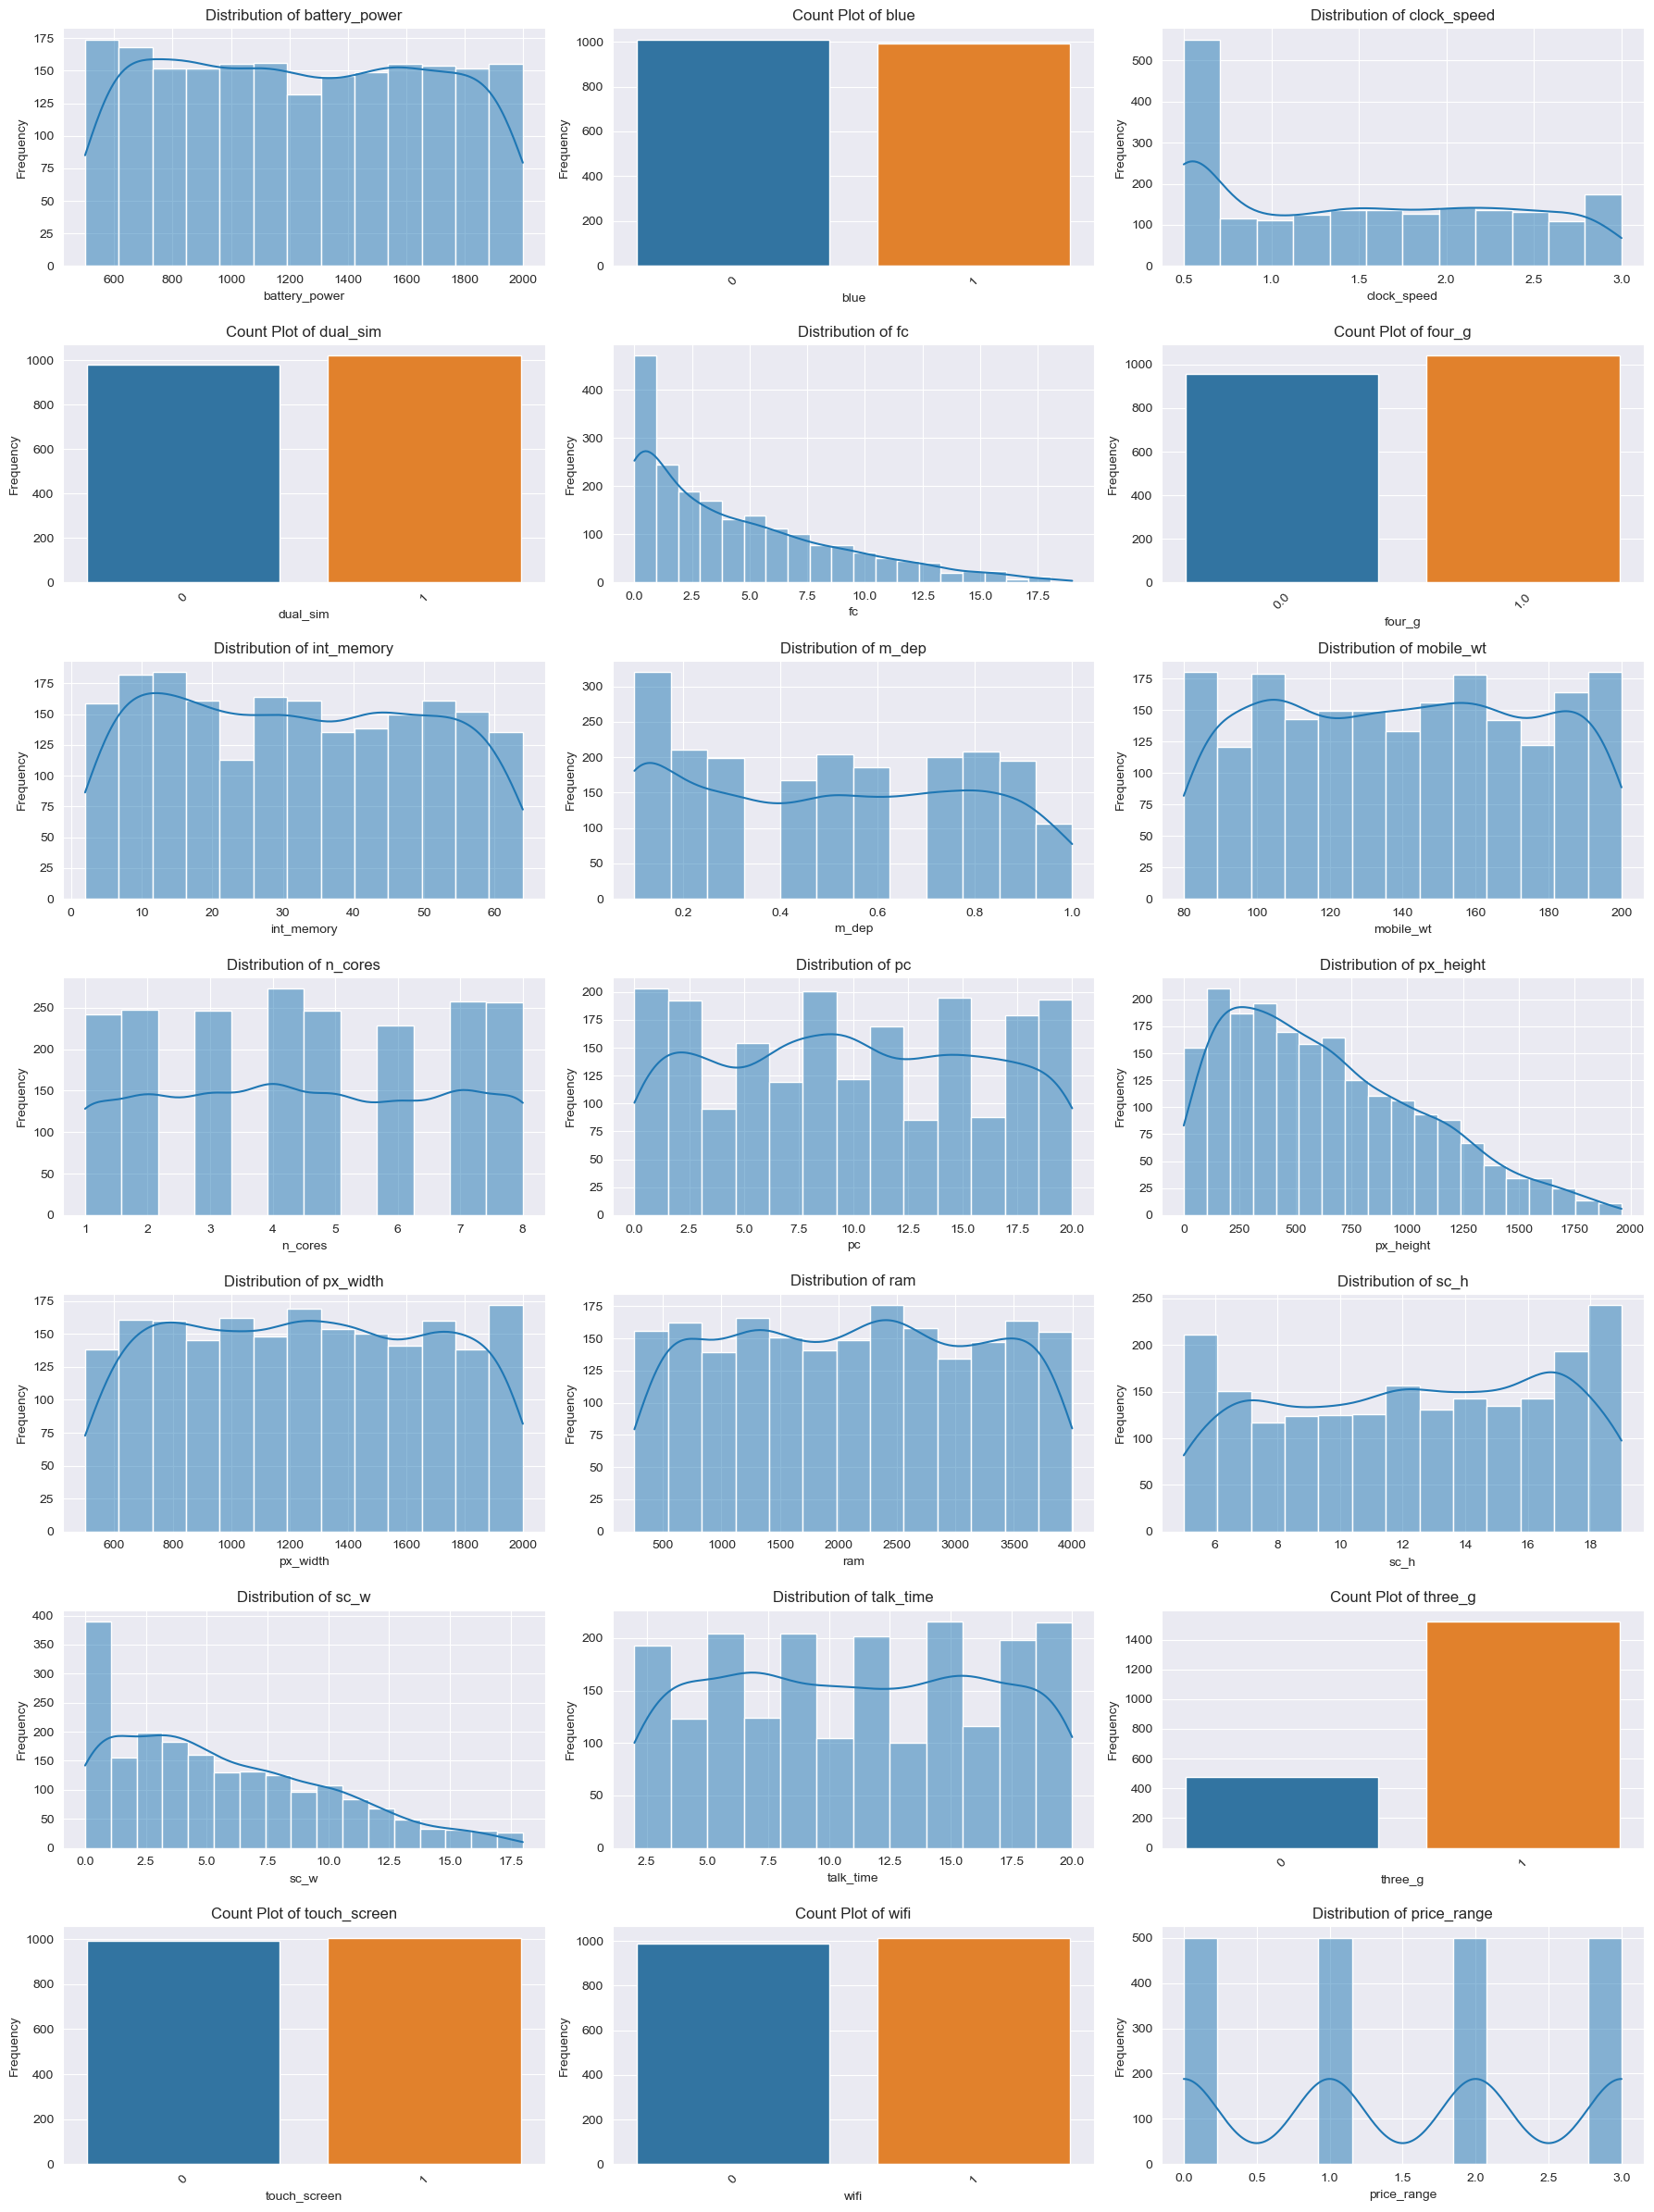

In [19]:
fig, axes = plt.subplots(7, 3, figsize=(18, 24))  # Adjust rows and columns based on your preference

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column (feature) and create corresponding plots
warnings.filterwarnings("ignore", category=FutureWarning)


for i, col in enumerate(data.columns):
    if col != 'price':  # Skip target variable 'price'
        ax = axes[i]
        if data[col].dtype == 'object' or data[col].nunique() < 3:  # Categorical feature
            sns.countplot(x=col, data=data, ax=ax)
            ax.set_title(f'Count Plot of {col}')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels if necessary
        else:  # Numerical feature
            sns.histplot(data[col], kde=True, ax=ax)
            ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()
plt.show()

In [20]:
# g = sns.pairplot(data)
# plt.title('Pairplots for all the Feature')
# g.map_upper(sns.kdeplot, levels=4, color=".2")
# plt.show()

# Data Preprocessing

### Removing duplicates

In [21]:
data.drop_duplicates(inplace=True)

### Checking NULL Values

In [22]:
data.isnull().sum().sort_values()


battery_power    0
touch_screen     0
three_g          0
talk_time        0
wifi             0
price_range      0
dual_sim         0
clock_speed      0
blue             0
sc_h             1
sc_w             1
px_width         2
ram              2
mobile_wt        4
n_cores          4
px_height        4
int_memory       5
m_dep            5
fc               5
four_g           5
pc               5
dtype: int64

In [23]:
data = data.dropna()

## Data Manipulation

#### Splitting data

In [24]:
X = data.drop(['price_range'],axis=1)
y = data['price_range']

In [25]:
correlation_matrix = X.corrwith(y)
correlation_matrix_abs = correlation_matrix.abs()  # Take absolute values of correlations
sorted_correlations = correlation_matrix_abs.sort_values(ascending=False)
sorted_correlations

ram              0.917448
battery_power    0.199277
px_width         0.163319
px_height        0.147956
int_memory       0.041812
sc_w             0.038371
pc               0.034716
mobile_wt        0.032168
touch_screen     0.030315
three_g          0.024896
fc               0.024738
sc_h             0.021643
blue             0.021330
talk_time        0.020511
wifi             0.019546
dual_sim         0.019108
four_g           0.015537
clock_speed      0.006675
n_cores          0.004662
m_dep            0.001396
dtype: float64

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [28]:
binary_features = ["blue", "dual_sim",  "four_g", "three_g", "touch_screen", "wifi"]
num_features= ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width", 
               "ram", "sc_h", "sc_w", "talk_time"]

In [29]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('binary', 'passthrough', binary_features)
])


In [30]:
X_preprocessed = preprocessor.fit_transform(X)

# Feature selection with RFE
model = RandomForestClassifier(random_state=42)
selector = RFE(model, n_features_to_select=6, step=1)
X_selected = selector.fit_transform(X_preprocessed, y)

In [31]:
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features (assuming X_preprocessed is a DataFrame)
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names and indices
print("Selected Feature Names:")
print(selected_feature_names)

Selected Feature Names:
Index(['battery_power', 'dual_sim', 'four_g', 'mobile_wt', 'n_cores', 'pc'], dtype='object')


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, train_size=0.8, test_size=0.2, random_state=100)

In [36]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [181]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


In [168]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

# Detailed classification report
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8947
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        94
           1       0.87      0.86      0.87       102
           2       0.90      0.84      0.87       109
           3       0.89      0.96      0.92        94

    accuracy                           0.89       399
   macro avg       0.90      0.90      0.90       399
weighted avg       0.89      0.89      0.89       399



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Define a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(decision_function_shape='ovr', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f'Training {name}...')
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))
    print('-'*50)

Training Logistic Regression...
Test Accuracy: 0.9724
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        94
           1       1.00      0.95      0.97       102
           2       0.99      0.95      0.97       109
           3       0.95      0.99      0.97        94

    accuracy                           0.97       399
   macro avg       0.97      0.97      0.97       399
weighted avg       0.97      0.97      0.97       399

--------------------------------------------------
Training Support Vector Machine...
Test Accuracy: 0.9248
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        94
           1       0.87      0.94      0.91       102
           2       0.97      0.85      0.91       109
           3       0.91      0.99      0.95        94

    accuracy                           0.92       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.93

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2']  # Penalty type for regularization
}

# Grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9774
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        94
           1       0.99      0.95      0.97       102
           2       0.98      0.97      0.98       109
           3       0.98      0.99      0.98        94

    accuracy                           0.98       399
   macro avg       0.98      0.98      0.98       399
weighted avg       0.98      0.98      0.98       399


### Feature extraction

In [40]:
import pickle
# Define the file path to save the model
model_file_path = 'logistic_regression_model.pkl'

# Save the model to a file using pickle
with open(model_file_path, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved successfully to '{model_file_path}'")

Model saved successfully to 'logistic_regression_model.pkl'


#### Checking correlation on train data:

In [53]:
# plt.figure(figsize=[25,20])
# sns.heatmap(train_X_std.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
# plt.show()